Author: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [1]:
!pip install pycm==3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.7/595.7 KB 16.2 MB/s eta 0:00:00


- determiners: every, some, at least, not every, exactly one, all but one, everyone of, no, not
- adjectives: green, happy, sad, good, bad
- adverbs: always, never, abnormally, elegantly

- sort ind escending order of counts
- modifiers -> classes of modfiers 
  - universal quantifiers
    - every, always, never, everyone of
  - existential quantifiers
    - some, at least, exactly one, all but one,
  - negation 
    - not every, no, not
  - adjectives/adverbs 
    - green, happy, sad, good, bad, abnormally, elegantly

- 4 classes over SVO (SUBJ-VERB-OBJECT)

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
import os
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/data"
os.path.exists(path)

True

In [4]:
%cd "/content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/data"

/content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/data


In [8]:
pd.read_excel(os.path.join(path,"sick1_annotations_nli_eval.xlsx")).columns

Index(['Unnamed: 0', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'R', 'H', 'S', 'Ground Truth', 'SICK_id', 'nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo'],
      dtype='object')

In [56]:
df = pd.read_excel(os.path.join(path,"sick1_annotations_nli_eval.xlsx"))[['Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'R', 'H', 'S', 'Ground Truth', 'SICK_id', 'nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo']]
df = df.rename(columns={'Part of Premise/Hypothesis Modified':'SVO (SUBJ-VERB-OBJECT)'})
df.head()

,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,SVO (SUBJ-VERB-OBJECT),M,E,R,H,S,Ground Truth,SICK_id,nli-deberta-v3-base,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,pair-classification-decomposable-attention-elmo
0,an old man is sitting in a field,a man is sitting in a field,NONE,NONE,NONE,FE,FE,FE,FE,FE,FE,129,FE,FE,FE
1,every old man is sitting in a field,a man is sitting in a field,every,premise,subject,FE,FE,FE,FE,FE,FE,129,FE,FE,FE
2,an old man is sitting in a field,every man is sitting in a field,every,hypothesis,subject,RE,RE,RE,RE,RE,RE,129,Neutral,Neutral,FE
3,every old man is sitting in a field,every man is sitting in a field,every,Both,subject,RE,RE,RE,RE,RE,RE,129,FE,FE,FE
4,some old man is sitting in a field,a man is sitting in a field,some,premise,subject,FE,Equivalence,FE,FE,FE,FE,129,FE,FE,FE


In [57]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly"]

In [86]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [87]:
df['Quantifier Type'] = df['Modifier'].apply(lambda x: get_quantifier_type(x)  )

In [ ]:
df['Quantifier Type'].to_list()

In [89]:
from pycm import *
cm_deberta = ConfusionMatrix(actual_vector=df['Ground Truth'].to_list(), predict_vector=df['nli-deberta-v3-base'].to_list())
cm_roberta = ConfusionMatrix(actual_vector=df['Ground Truth'].to_list(), predict_vector=df['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli'].to_list())
cm_elmo = ConfusionMatrix(actual_vector=df['Ground Truth'].to_list(), predict_vector=df['pair-classification-decomposable-attention-elmo'].to_list())

cm_deberta.table, cm_roberta.table, cm_elmo.table

({'FE': {'FE': 73, 'Negation': 0, 'Neutral': 3, 'RE': 0},
  'Negation': {'FE': 0, 'Negation': 1, 'Neutral': 0, 'RE': 0},
  'Neutral': {'FE': 10, 'Negation': 9, 'Neutral': 20, 'RE': 0},
  'RE': {'FE': 3, 'Negation': 1, 'Neutral': 2, 'RE': 0}},
 {'FE': {'FE': 76, 'Negation': 0, 'Neutral': 0, 'RE': 0},
  'Negation': {'FE': 0, 'Negation': 1, 'Neutral': 0, 'RE': 0},
  'Neutral': {'FE': 5, 'Negation': 10, 'Neutral': 24, 'RE': 0},
  'RE': {'FE': 3, 'Negation': 1, 'Neutral': 2, 'RE': 0}},
 {'FE': {'FE': 76, 'Negation': 0, 'Neutral': 0, 'RE': 0},
  'Negation': {'FE': 1, 'Negation': 0, 'Neutral': 0, 'RE': 0},
  'Neutral': {'FE': 39, 'Negation': 0, 'Neutral': 0, 'RE': 0},
  'RE': {'FE': 6, 'Negation': 0, 'Neutral': 0, 'RE': 0}})

In [90]:
cm_deberta.print_matrix()

Predict        FE             Negation       Neutral        RE             
Actual
FE             73             0              3              0              

Negation       0              1              0              0              

Neutral        10             9              20             0              

RE             3              1              2              0              




In [91]:
cm_deberta.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.88525
F1 Macro                                                          0.42323
FPR Macro                                                         0.10637
Kappa                                                             0.536
Overall ACC                                                       0.77049
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.61834
Zero-one Loss                                                     28

Class Statistics :

Classes                                                           FE            Negation      Neutral       RE            
ACC(Accuracy)                                                     0.86885       0.91803       0.80328       0.95082       
AUC(Area under the ROC curve)                        

In [92]:
cm_roberta.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.91393
F1 Macro                                                          0.46058
FPR Macro                                                         0.07223
Kappa                                                             0.65721
Overall ACC                                                       0.82787
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Substantial
TPR Macro                                                         0.65385
Zero-one Loss                                                     21

Class Statistics :

Classes                                                           FE            Negation      Neutral       RE            
ACC(Accuracy)                                                     0.93443       0.90984       0.86066       0.95082       
AUC(Area under the ROC curve)                   

In [93]:
cm_elmo.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.81148
F1 Macro                                                          0.19192
FPR Macro                                                         0.25
Kappa                                                             0.0
Overall ACC                                                       0.62295
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Slight
TPR Macro                                                         0.25
Zero-one Loss                                                     46

Class Statistics :

Classes                                                           FE            Negation      Neutral       RE            
ACC(Accuracy)                                                     0.62295       0.9918        0.68033       0.95082       
AUC(Area under the ROC curve)                                  

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbe447b13d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe447041f0>)

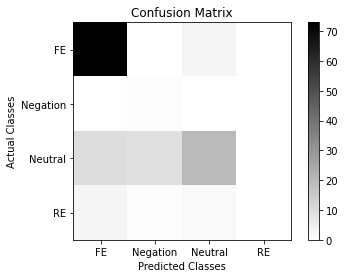

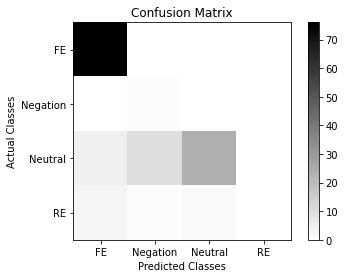

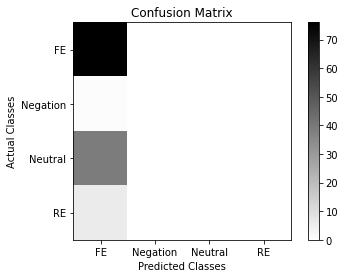

In [94]:
cm_deberta.plot(), cm_roberta.plot(), cm_elmo.plot()

In [95]:
cp = Compare({"cm_deberta":cm_deberta,"cm_roberta":cm_roberta, "cm_elmo":cm_elmo})
print(cp)

Best : cm_roberta

Rank   Name          Class-Score       Overall-Score
1      cm_roberta    0.22083           0.50833
2      cm_deberta    0.19167           0.40556
3      cm_elmo       0.08542           0.18611



In [96]:
cp.best, cp.sorted, cp.best_name

(pycm.ConfusionMatrix(classes: ['FE', 'Negation', 'Neutral', 'RE']),
 ['cm_roberta', 'cm_deberta', 'cm_elmo'],
 'cm_roberta')

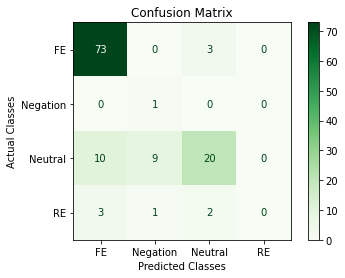

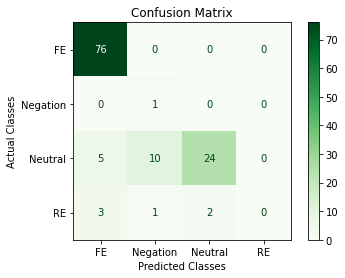

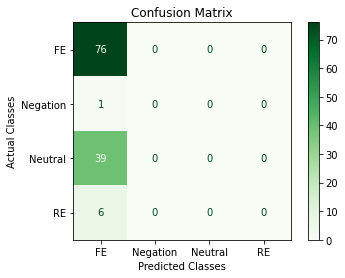

In [97]:
from matplotlib import pyplot as plt
cm_deberta.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")
cm_roberta.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")
cm_elmo.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")

In [120]:
res = df.groupby(['SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'nli-deberta-v3-base','Quantifier Type']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT', 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and 'Ground Truth','nli-deberta-v3-base' ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and 'Ground Truth','nli-deberta-v3-base' ******** 


,Modified SUBJ/VERB/OBJECT,Ground Truth,nli-deberta-v3-base,Count
1,Object,FE,FE,23
6,Subject,FE,FE,21
17,subject,FE,FE,11
5,Object,Neutral,Neutral,9
13,Verb,FE,FE,8
24,verb,FE,FE,7
10,Subject,Neutral,Neutral,6
0,NONE,FE,FE,3
27,verb,Neutral,Negation,3
19,subject,Neutral,FE,3


In [121]:
df['Quantifier Type'].value_counts()

Adjectives/Adverbs    43
Existential           33
Universal             20
Negation              17
NONE                   9
Name: Quantifier Type, dtype: int64

In [122]:
df['SVO (SUBJ-VERB-OBJECT)'].value_counts()

Object     36
Subject    35
subject    19
verb       15
Verb       14
NONE        3
Name: SVO (SUBJ-VERB-OBJECT), dtype: int64

## nli-deberta-v3-base

- Most neutral labels in ground truth seems to be confused by this model wherever the modifiers were abnormally, all but one, every, exactly one, never, no, not, not every.
  - Universal Quantifiers
  - Negation

In [127]:
r = df.groupby(['Ground Truth','nli-deberta-v3-base']).count().reset_index()[['Ground Truth',	'nli-deberta-v3-base',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,Ground Truth,nli-deberta-v3-base,Count
0,FE,FE,73
5,Neutral,Neutral,20
3,Neutral,FE,10
4,Neutral,Negation,9
1,FE,Neutral,3
6,RE,FE,3
8,RE,Neutral,2
2,Negation,Negation,1
7,RE,Negation,1


In [112]:
res = df.groupby(['Quantifier Type','SVO (SUBJ-VERB-OBJECT)']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Quantifier Type','SVO (SUBJ-VERB-OBJECT)','Ground Truth']]
r= r.rename(columns={'Ground Truth':"Count", 'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT'})
print("****** Counts for Quantifier type for each Modified SUBJ/VERB/OBJECT ******** ")
r
#res[res['Ground Truth'] != res['nli-deberta-v3-base']].sort_values(by='Premise/Hypothesis/Both',ascending=False)

****** Counts for Quantifier type for each Modified SUBJ/VERB/OBJECT ******** 


,Quantifier Type,Modified SUBJ/VERB/OBJECT,Count
0,Adjectives/Adverbs,Object,15
1,Adjectives/Adverbs,Subject,15
6,Existential,Subject,12
7,Existential,subject,12
5,Existential,Object,9
9,NONE,Object,6
19,Universal,verb,6
4,Adjectives/Adverbs,verb,6
2,Adjectives/Adverbs,Verb,6
11,Negation,Subject,5


In [116]:
res = df.groupby(['Quantifier Type', 'Ground Truth','nli-deberta-v3-base']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Quantifier Type','Ground Truth', 'nli-deberta-v3-base','SVO (SUBJ-VERB-OBJECT)']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Count'})
print("****** Counts for Quantifier type , Ground Truth, nli-deberta-v3-base ******** ")
r

****** Counts for Quantifier type and 'Ground Truth','nli-deberta-v3-base' ******** 


,Quantifier Type,Ground Truth,nli-deberta-v3-base,Count
0,Adjectives/Adverbs,FE,FE,29
3,Existential,FE,FE,23
2,Adjectives/Adverbs,Neutral,Neutral,12
17,Universal,FE,FE,9
9,NONE,FE,FE,7
11,Negation,FE,FE,5
14,Negation,Neutral,Negation,4
13,Negation,Neutral,FE,4
5,Existential,Neutral,FE,3
20,Universal,Neutral,Neutral,3


In [138]:
res = df.groupby(['SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'nli-deberta-v3-base','Quantifier Type']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT','Quantifier Type':'Count'})
print("****** Counts for Quantifier type , Ground Truth, nli-deberta-v3-base ******** ")
r

****** Counts for Quantifier type , Ground Truth, nli-deberta-v3-base ******** 


,Modified SUBJ/VERB/OBJECT,Ground Truth,nli-deberta-v3-base,Count
1,Object,FE,FE,23
6,Subject,FE,FE,21
17,subject,FE,FE,11
5,Object,Neutral,Neutral,9
13,Verb,FE,FE,8
24,verb,FE,FE,7
10,Subject,Neutral,Neutral,6
0,NONE,FE,FE,3
27,verb,Neutral,Negation,3
19,subject,Neutral,FE,3


In [139]:
res2 = df.groupby(['Quantifier Type','SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'nli-deberta-v3-base']).count().reset_index()
result = res2[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','nli-deberta-v3-base', 'Premise/Hypothesis/Both']]
print("****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for nli-deberta-v3-base are: ******")
r = result[result['Ground Truth'] != result['nli-deberta-v3-base']][['Quantifier Type',	'SVO (SUBJ-VERB-OBJECT)', 'Premise/Hypothesis/Both']].groupby(['Quantifier Type']).count().reset_index().sort_values(by='Premise/Hypothesis/Both',ascending=False)
r

****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for nli-deberta-v3-base are: ******


,Quantifier Type,SVO (SUBJ-VERB-OBJECT),Premise/Hypothesis/Both
1,Existential,8,8
2,Negation,7,7
3,Universal,7,7
0,Adjectives/Adverbs,2,2


In [133]:
print("****** The confused predictions for each Type of Quantifier for nli-deberta-v3-base are: ******")
this_res = result[result['Ground Truth'] != result['nli-deberta-v3-base']][['Quantifier Type',	'SVO (SUBJ-VERB-OBJECT)', 'Premise/Hypothesis/Both']].groupby(['Quantifier Type','SVO (SUBJ-VERB-OBJECT)']).count().reset_index().sort_values(by='Premise/Hypothesis/Both',ascending=False)
this_res.rename(columns={'Premise/Hypothesis/Both':'Count'})

****** The confused predictions for each Type of Quantifier for nli-deberta-v3-base are: ******


,Quantifier Type,SVO (SUBJ-VERB-OBJECT),Count
3,Existential,Subject,3
4,Existential,subject,3
2,Existential,Object,2
5,Negation,Object,2
6,Negation,Subject,2
10,Universal,Subject,2
12,Universal,subject,2
13,Universal,verb,2
0,Adjectives/Adverbs,Verb,1
1,Adjectives/Adverbs,verb,1


In [136]:
print("****** The confused predictions for each Type of Quantifier,  for nli-deberta-v3-base are: ******")
this_res = result[result['Ground Truth'] != result['nli-deberta-v3-base']][['Quantifier Type',	'SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'nli-deberta-v3-base','Premise/Hypothesis/Both']].sort_values(by='Premise/Hypothesis/Both',ascending=False)
this_res.rename(columns={'Premise/Hypothesis/Both':'Count', 'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT'})

****** The confused predictions for each Type of Quantifier,  for nli-deberta-v3-base are: ******


,Quantifier Type,Modified SUBJ/VERB/OBJECT,Ground Truth,nli-deberta-v3-base,Count
30,Negation,Subject,Neutral,FE,2
21,Existential,subject,Neutral,FE,2
34,Negation,Verb,Neutral,Negation,2
54,Universal,verb,Neutral,Negation,2
16,Existential,Subject,FE,Neutral,1
17,Existential,Subject,Neutral,FE,1
53,Universal,verb,Neutral,FE,1
51,Universal,subject,RE,Neutral,1
50,Universal,subject,RE,FE,1
47,Universal,Verb,Neutral,Negation,1


## ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli vs Ground truth based on Modifiers

- Most neutral labels in ground truth seems to be confused by this model wherever the modifiers were all but one, exactly one, never, no, not, not every

In [140]:
r = df.groupby(['Ground Truth','nli-deberta-v3-base']).count().reset_index()[['Ground Truth',	'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,Ground Truth,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,Count
0,FE,73,73
5,Neutral,20,20
3,Neutral,10,10
4,Neutral,9,9
1,FE,3,3
6,RE,3,3
8,RE,2,2
2,Negation,1,1
7,RE,1,1


In [144]:
res = df.groupby(['Quantifier Type', 'Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Quantifier Type','Ground Truth', 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli','SVO (SUBJ-VERB-OBJECT)']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Count'})
print("****** Counts for Quantifier type , Ground Truth, ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli ******** ")
r

****** Counts for Quantifier type , Ground Truth, ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli ******** 


,Quantifier Type,Ground Truth,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,Count
0,Adjectives/Adverbs,FE,FE,29
2,Existential,FE,FE,26
1,Adjectives/Adverbs,Neutral,Neutral,14
15,Universal,FE,FE,9
7,NONE,FE,FE,7
12,Negation,Neutral,Negation,6
9,Negation,FE,FE,5
18,Universal,Neutral,Neutral,3
5,Existential,Neutral,Neutral,3
17,Universal,Neutral,Negation,3


In [145]:
res = df.groupby(['SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli','Quantifier Type']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT','Quantifier Type':'Count'})
print("****** Counts for Quantifier type , Ground Truth, ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli ******** ")
r

****** Counts for Quantifier type , Ground Truth, ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli ******** 


,Modified SUBJ/VERB/OBJECT,Ground Truth,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,Count
1,Object,FE,FE,24
4,Subject,FE,FE,22
13,subject,FE,FE,12
3,Object,Neutral,Neutral,10
10,Verb,FE,FE,8
19,verb,FE,FE,7
7,Subject,Neutral,Neutral,7
0,NONE,FE,FE,3
11,Verb,Neutral,Negation,3
22,verb,Neutral,Negation,3


In [146]:
res2 = df.groupby(['Quantifier Type','SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']).count().reset_index()
result = res2[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli', 'Premise/Hypothesis/Both']]
print("****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli are: ******")
r = result[result['Ground Truth'] != result['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']][['Quantifier Type',	'SVO (SUBJ-VERB-OBJECT)', 'Premise/Hypothesis/Both']].groupby(['Quantifier Type']).count().reset_index().sort_values(by='Premise/Hypothesis/Both',ascending=False)
r

****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli are: ******


,Quantifier Type,SVO (SUBJ-VERB-OBJECT),Premise/Hypothesis/Both
1,Negation,7,7
2,Universal,7,7
0,Existential,3,3


In [57]:
res2 = df.groupby(['Modifier','Ground Truth', 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']).count().reset_index()
result = res2[['Modifier','Ground Truth','ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli are: ******")
result[result['Ground Truth'] != result['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli']]

****** The confused predictions for each modifier for ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli are: ******


,Modifier,Ground Truth,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,Premise/Hypothesis/Both
4,all but one,Neutral,FE,1
5,all but one,Neutral,Negation,1
6,all but one,RE,Negation,1
15,every,RE,FE,2
16,every,RE,Neutral,2
18,exactly one,Neutral,FE,1
27,never,Neutral,FE,1
28,never,Neutral,Negation,3
29,no,Neutral,Negation,1
30,no,RE,FE,1


## pair-classification-decomposable-attention-elmo

- Most neutral labels in ground truth seems to be confused by this model wherever the modifiers were all but one, always, bad, elegantly, every, exactly one, good, green, happy, never, no, not, not every, sad

In [148]:
r = df.groupby(['Ground Truth','pair-classification-decomposable-attention-elmo']).count().reset_index()[['Ground Truth',	'pair-classification-decomposable-attention-elmo',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,Ground Truth,pair-classification-decomposable-attention-elmo,Count
0,FE,FE,76
2,Neutral,FE,39
3,RE,FE,6
1,Negation,FE,1


In [149]:
res = df.groupby(['Quantifier Type', 'Ground Truth','pair-classification-decomposable-attention-elmo']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','pair-classification-decomposable-attention-elmo', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Quantifier Type','Ground Truth', 'pair-classification-decomposable-attention-elmo','SVO (SUBJ-VERB-OBJECT)']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Count'})
print("****** Counts for Quantifier type , Ground Truth, pair-classification-decomposable-attention-elmo ******** ")
r

****** Counts for Quantifier type , Ground Truth, pair-classification-decomposable-attention-elmo ******** 


,Quantifier Type,Ground Truth,pair-classification-decomposable-attention-elmo,Count
0,Adjectives/Adverbs,FE,FE,29
2,Existential,FE,FE,26
1,Adjectives/Adverbs,Neutral,FE,14
9,Negation,Neutral,FE,10
11,Universal,FE,FE,9
5,NONE,FE,FE,7
12,Universal,Neutral,FE,7
3,Existential,Neutral,FE,6
7,Negation,FE,FE,5
13,Universal,RE,FE,4


In [150]:
res = df.groupby(['SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','pair-classification-decomposable-attention-elmo']).count().reset_index()[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','pair-classification-decomposable-attention-elmo', 'Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'pair-classification-decomposable-attention-elmo','Quantifier Type']]
r= r.rename(columns={'SVO (SUBJ-VERB-OBJECT)':'Modified SUBJ/VERB/OBJECT','Quantifier Type':'Count'})
print("****** Counts for Quantifier type , Ground Truth, pair-classification-decomposable-attention-elmo ******** ")
r

****** Counts for Quantifier type , Ground Truth, pair-classification-decomposable-attention-elmo ******** 


,Modified SUBJ/VERB/OBJECT,Ground Truth,pair-classification-decomposable-attention-elmo,Count
1,Object,FE,FE,24
3,Subject,FE,FE,22
2,Object,Neutral,FE,12
8,subject,FE,FE,12
4,Subject,Neutral,FE,10
6,Verb,FE,FE,8
11,verb,FE,FE,7
13,verb,Neutral,FE,7
7,Verb,Neutral,FE,6
9,subject,Neutral,FE,4


In [147]:
res2 = df.groupby(['Quantifier Type','SVO (SUBJ-VERB-OBJECT)','Ground Truth', 'pair-classification-decomposable-attention-elmo']).count().reset_index()
result = res2[[ 'Quantifier Type', 'SVO (SUBJ-VERB-OBJECT)', 'Ground Truth','pair-classification-decomposable-attention-elmo', 'Premise/Hypothesis/Both']]
print("****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for pair-classification-decomposable-attention-elmo are: ******")
r = result[result['Ground Truth'] != result['pair-classification-decomposable-attention-elmo']][['Quantifier Type',	'SVO (SUBJ-VERB-OBJECT)', 'Premise/Hypothesis/Both']].groupby(['Quantifier Type']).count().reset_index().sort_values(by='Premise/Hypothesis/Both',ascending=False)
r

****** The # of confused i.e. unmatched predictions for each Type of Quantifier and Modified SUBJ/VERB/OBJECT for pair-classification-decomposable-attention-elmo are: ******


,Quantifier Type,SVO (SUBJ-VERB-OBJECT),Premise/Hypothesis/Both
3,Negation,7,7
4,Universal,5,5
0,Adjectives/Adverbs,4,4
1,Existential,4,4
2,NONE,1,1


In [153]:
res3 = df.groupby(['Quantifier Type','Ground Truth', 'pair-classification-decomposable-attention-elmo']).count().reset_index()
result = res3[['Quantifier Type','Ground Truth','pair-classification-decomposable-attention-elmo', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for pair-classification-decomposable-attention-elmo are: ******")
result[result['Ground Truth'] != result['pair-classification-decomposable-attention-elmo']]

****** The confused predictions for each modifier for pair-classification-decomposable-attention-elmo are: ******


,Quantifier Type,Ground Truth,pair-classification-decomposable-attention-elmo,Premise/Hypothesis/Both
1,Adjectives/Adverbs,Neutral,FE,14
3,Existential,Neutral,FE,6
4,Existential,RE,FE,1
6,NONE,Neutral,FE,2
8,Negation,Negation,FE,1
9,Negation,Neutral,FE,10
10,Negation,RE,FE,1
12,Universal,Neutral,FE,7
13,Universal,RE,FE,4
